# Word2vec

In [1]:
sentences = [['this', 'is', 'a', 'first', 'example', 'of', 'text'],
    ['this', 'is', 'the', 'second', 'example'],
    ['yet', 'another', 'example'],
    ['one', 'more', 'example'],
    ['and', 'the', 'final', 'example']]

In [2]:
from gensim.models import Word2Vec

model = Word2Vec(sentences, min_count=1, size=10,window=3)
print(model)


Word2Vec(vocab=15, size=10, alpha=0.025)


In [3]:
words = list(model.wv.vocab)
print(words)



['this', 'is', 'a', 'first', 'example', 'of', 'text', 'the', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']


In [4]:

print("v(final)="+str(model.wv['final']))

# save model
model.save('model.bin')

v(final)=[-0.00838302 -0.00762286  0.002421    0.04210151  0.01538225  0.0485583
  0.0471771  -0.01081826 -0.02978351  0.0048116 ]


In [5]:
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=15, size=10, alpha=0.025)


In [6]:
X = model.wv[new_model.wv.vocab]

In [7]:
X.shape

(15, 10)

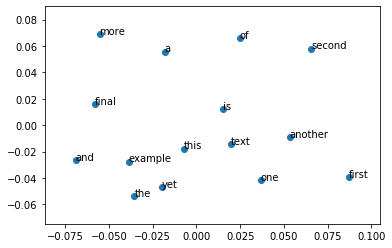

In [8]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

In [9]:
import gensim.downloader as api

In [10]:
corpus = api.load('text8')

In [11]:
type(corpus)


text8.Dataset

In [12]:
from gensim.models.word2vec import Word2Vec
model8= Word2Vec(corpus)

In [13]:
model8.wv['tree']

array([-1.5870819 , -0.37244782,  0.07038775,  0.20984192, -1.5239096 ,
        2.9450762 ,  2.6224647 ,  0.7093988 ,  0.5881422 ,  0.72838694,
       -0.10204369, -1.5606936 ,  0.20161541,  1.0037261 ,  0.9479234 ,
       -1.6589435 ,  0.8982269 , -0.5223006 , -1.8284905 , -1.5719998 ,
        0.7883408 , -1.4280453 ,  0.25118744,  2.0979958 ,  0.43558586,
       -0.05415174,  0.1025854 ,  0.71213317, -2.567227  , -0.59153754,
       -0.493408  ,  0.11544316,  1.2541002 ,  0.6602103 ,  0.5469673 ,
       -0.40347907, -0.3215866 , -0.1139168 ,  2.7030475 , -2.4955297 ,
        2.0498612 , -0.39997587,  0.7096913 ,  0.4369082 , -0.9869272 ,
        2.6978457 , -1.0545275 ,  0.920465  ,  0.76213145,  0.05792451,
       -0.45973492, -1.6289301 ,  0.64199674, -0.15452921,  0.07478718,
       -0.46988288, -0.54209864, -0.03202106, -1.4742621 ,  0.6851377 ,
       -0.55873173, -1.3190101 ,  0.31208777,  1.3973069 ,  0.09586618,
        1.2242911 ,  0.7351456 , -0.5292207 , -0.53942156,  0.41

In [14]:
print(model8.wv.most_similar('tree'))

[('trees', 0.7239347696304321), ('leaf', 0.7017390727996826), ('bark', 0.6756103038787842), ('pond', 0.6039673089981079), ('fruit', 0.5994572639465332), ('cactus', 0.5991237163543701), ('leaves', 0.5843262076377869), ('garden', 0.5841811895370483), ('bird', 0.5836094617843628), ('flower', 0.5823007225990295)]


In [15]:
print(model8.wv.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


/home/mausoto/anaconda3/lib/python3.7/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


# Analogies

In [16]:
#v(king)-v(man)+v(woman)
print(model8.wv.most_similar(positive=['king', 'woman'], negative=['man'], topn=3))

[('queen', 0.6861884593963623), ('empress', 0.5853868126869202), ('elizabeth', 0.5785930752754211)]


In [17]:
print(model8.wv.most_similar(positive=['italy', 'renault'], negative=['france'], topn=3))


[('ferrari', 0.6925289630889893), ('scuderia', 0.6863264441490173), ('curtiss', 0.6829074621200562)]


In [18]:
print(model8.wv.most_similar(positive=['france', 'venice'], negative=['italy'], topn=3))


[('bologna', 0.757117509841919), ('toulouse', 0.7449429035186768), ('bruges', 0.7355884313583374)]


In [19]:
print(model8.wv.most_similar(positive=['usa', 'beatles'], negative=['england'], topn=3))

[('dj', 0.647071123123169), ('britney', 0.6389771699905396), ('promotional', 0.6309278011322021)]


In [20]:
model8.wv.most_similar(['apple','orange'])

[('mcintosh', 0.641545295715332),
 ('logo', 0.6026994585990906),
 ('jaguar', 0.5909193754196167),
 ('iie', 0.5849088430404663),
 ('pok', 0.5848257541656494),
 ('lynx', 0.5846157073974609),
 ('iic', 0.576237678527832),
 ('octopus', 0.5751309990882874),
 ('lemon', 0.5740578174591064),
 ('nes', 0.5713634490966797)]

##  Loading pre-trained models

In [23]:
# Load pretrained model GoogleNews-vectors-negative300.bin.gz
# https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing

from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [24]:
print(model.most_similar('tree'))

[('trees', 0.8293122053146362), ('pine_tree', 0.7622087001800537), ('oak_tree', 0.731893002986908), ('evergreen_tree', 0.6926872730255127), ('fir_tree', 0.6917217969894409), ('willow_tree', 0.6845874190330505), ('pine_trees', 0.6824266910552979), ('maple_tree', 0.6803498268127441), ('sycamore_tree', 0.6681811213493347), ('tress', 0.6547873020172119)]


In [32]:
print(model.most_similar(positive=['germany', 'monarchy'], negative=['netherlands'], topn=3))


[('Monarchy', 0.4897083640098572), ('constitutional_monarchy', 0.48723936080932617), ('royalists', 0.45945388078689575)]


In [30]:
print(model.most_similar(positive=['italy', 'manchester_united'], negative=['england'], topn=3))


[('real_madrid', 0.6134896278381348), ('juventus', 0.6055796146392822), ('Ac_Milan', 0.6013585329055786)]


## Glove

In [34]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'glove.42B.300d.txt'
word2vec_output_file = 'glove.42B.300d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

(1917494, 300)

In [35]:
from gensim.models import KeyedVectors

filename = 'glove.42B.300d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)

result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7833545804023743)]


In [36]:
print(model.most_similar('tree'))

[('trees', 0.8341457843780518), ('branches', 0.6109410524368286), ('leaf', 0.6104052066802979), ('pine', 0.6100702285766602), ('forest', 0.5894954204559326), ('garden', 0.5828164219856262), ('vine', 0.5765968561172485), ('branch', 0.5740604400634766), ('flower', 0.5736389756202698), ('willow', 0.5727055668830872)]
